ctrl shift c ctrl shift t ctrl shift r

### Common definitions

1. Views - a stored query definition that can be used to simplify writing T-SQL statements or to secure data access, can be thought of as simplified data design to perform queries faster
2. Stored Procedures - stored script that can include queries, DDL to create or modify objects and programming logic. they can return tabular data.
3. User defined functions - similar to stored procedures but can return tabular data as well as single value, cant affect anything outside the function.
4. Indexes - data structure that increases the speed of queries
5. Constraints - rules that govern the behavious and permissible values of the table and the columns
6. Triggers - special type of stored procedures that fires when something happens in the database like when a row is inserted or when an object is created
7. Sequences - User defined object that generates a sequence of numbers 
8. Assemblies - references to database objects created in a .Net language, this functionality is valled common language runtime (CLR) integration

### SQL server files

- a database must have 2 files 

1. data file with .mdf extension
2. log file with .ldf extension

- additional data files if used have the .ndf extension
- data files can be grouped together strategically to backup only portions of the database
- log file stored transactions or changes to the data to ensure consistency
- backups of the log files can be taken for DB restoration

### some notes

- each table in a normalized database should hold information about only one type of entity and a primary key.
- each column has a definition specifying a data type along with rules AKA constraints.
- we can have a computed data type where the value of the column is calculated with a formula 
    - 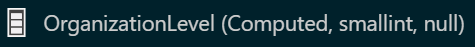
- we can have user defined data types as well
    - like a phone number in the adventure works DB
- we can create custom data types called CLR data types with multiple properties and methods using a .NET language such as C#

### Indexes

- everytime we create a key or a unique column we place an index on the column
- indexes are stored separately from the data but accessed automatically when we run a query
- and are updated everytime a row is added or removed from the table
- index is a data structure to help DB look up information fast, usually a balanced tree on data that can be ordered and searched using the equality operators \<,\>,\<=,\>=,==, and between
- its created automatically but we can create it with create index command
- instead of Btrees there are other generalized types of indexes as well

kinds of indexes

1. clustered
2. stores and organizes the table
3. arrange the data in the table like sort to make look up faster
4. a table can have only one clustered index thats because its just the entire table sorted on the cluster key
5. when we add new rows old rows dont have to move for them to stay in order because the new row will be added into the correct data page which will have some free space
6. a list of pointers is maintained to keep track of the order of the pages, so the rows in the other pages wont have to move
7. usually the primary key is used as the cluster key
8. non-clustered
9. defined on one or more columns of the table, its a separate strcuture that points to the actual table
10. stores the data and records in different tablesso that scanning records is faster to look for the data you want
11. we can have 999 unclustered index per table
12. these may be actually used if working with sparse columns

indexes are optional but greatly improve performance when properly designed and implemented

but they can also take up disk space

If a table has four nonclustered indexes, every write to that table may require four additional writes to keep the indexes up to date

### Example

- phone directory, primary key is the phone number but the cluster key is the first name plus the last name
- if the name starts with d you start looking in the beginning of the directory in your brain you did this calculation
    - mid alphabet is j or k and d\<j or k so it must be in the first half, thats basically a binary search

### schemas

- a collection to organize database objects and tables within the database
- a User has a default schema and when accessing an object in the default schema you dont have to specify the schema name but tis good practice to do so
- if a user has permission to create new objects the objects belong to the user's default schema unless specified other wise

### SELECT queries

- In a select statement from is the first clause the database engine evaluates
- The word GO doesn’t really do anything except divide the code up into separate distinct code batches.

In [ ]:
USE AdventureWorks2022;
--changing to the example database
GO
SELECT BusinessEntityID, JobTitle
FROM HumanResources.Employee;

- Column and table names need to follow specific naming rules so that SQL Server’s parser can recognize them. When a table, column, or database has a name that doesn’t follow those rules, you can still use that name, but you must enclose it within square brackets (\[\]).
- SQL Server allows you to create or rename a column within a query by using what is known as an alias. You use the keyword AS to specify an alias for the column.
- You can specify an alias name immediately following a column name. If an alias contains a space or is a reserved word—basically, keywords used to write T-SQL statements—you can surround the alias with square brackets, single quotes, or double quotes.

In [ ]:
SELECT 'A Literal Value' AS "Literal Value",
BusinessEntityID AS EmployeeID,
LoginID,
JobTitle
FROM HumanResources.Employee;

In [ ]:
SELECT EMP.JobTitle
FROM HumanResources.Employee AS EMP;

There is a property called collation that determines whether or not case matters. If the database is set to use a case-sensitive collation, then the names of the tables and columns must match exactly.  
  

single quotes are used for literal values

double quotes for column names, aliases and table names and aliases. double quotes or square brackets are necessary when name contains a space or is a keyword

1. <span style="color: var(--vscode-foreground);">Switch to the AdventureWorks database&nbsp;</span> <span style="color: var(--vscode-foreground);">Write a SELECT statement that lists the customers. Include the CustomerID, StoreID, and AccountNumber columns from the Sales.Customer table.</span>

In [ ]:
SELECT cus.CustomerID, cus.StoreID, cus.AccountNumber
FROM Sales.Customer AS cus;

2\. Write a SELECT statement that lists the name, product number, and color of each product from the Production.Product table.

In [ ]:
SELECT prod.Name, prod.Color
FROM Production.Product as prod;

3\. Write a SELECT statement that lists the customer ID numbers and sales order ID numbers from the Sales.SalesOrderHeader table.

In [ ]:
SELECT sales.CustomerID,sales.SalesOrderID
FROM Sales.SalesOrderHeader AS sales;

4\. Switch to the WideWorldImporters database for the remaining questions in this exercise. Write a SELECT statement that lists only the StateProvinceCode and the StateProvinceName from the Application.StateProvinces table. Include a literal value as the first column in the SELECT list: 'State Abbr/Name:'.

In [ ]:
SELECT 'omaewa mo shindeiru' AS "nani", StateProvinceCode, StateProvinceName
from Application.StateProvinces;

### Filtering data with the WHERE clause

1. the database engine evaluates the WHERE clause second after the FROM statement
2. <span style="font-size: 14px; color: var(--vscode-foreground);">the where clause expects predicates that can be calculated to true/false or unknown</span>

<span style="font-size: 14px;">Syntax</span>

<span style="font-size: 14px;"><br></span>

SELECT \<c1\>,\<c2\>   
<span style="color: var(--vscode-foreground);">FROM &lt;schema&gt;.&lt;table&gt;&nbsp;<br></span> <span style="color: var(--vscode-foreground);">WHERE &lt;column&gt;=&lt;val&gt;;</span>

Examples

In [ ]:
SELECT CustomerID, SalesOrderID
FROM Sales.SalesOrderHeader
WHERE CustomerID=11000;

SELECT CustomerID, SalesOrderID, OrderDate
FROM Sales.SalesOrderHeader
WHERE OrderDate = '2011-07-02';

SELECT BusinessEntityID, LoginID, JobTitle
FROM HumanResources.Employee
WHERE JobTitle = 'Chief Executive Officer';

-- single line comment

/*
multi line
comment
*/

### other operators to use with WHERE

1. \\\>
2. \<
3. \=
4. \<=
5. \\\>=
6. \<\>
7. !=
8. !\<
9. !\>
10. BETWEEN

In [ ]:
SELECT top 10 BusinessEntityID, FirstName
FROM Person.Person
WHERE FirstName > 'M';

if we do firstname \> 'M'  
you may think that only rows with the first name beginning with the letter N or later in the alphabet should be returned. However, if any FirstName value begins with M followed by at least one additional character, the value is greater than M, so the row will be returned.

!\> 'M' will mean \<= 'M'

BETWEEN operator with the WHERE clause  
usually used with dates, and the the edges of our logical clause are included in the result

when using the between operator the frist value must be smaller  
  
Syntax

SELECT c1, c2  
<span style="color: var(--vscode-foreground);">FROM schema.table<br></span><span style="color: var(--vscode-foreground);">WHERE c3 BETWEEN val1 AND val2</span>

In [ ]:
SELECT CustomerID, SalesOrderID, OrderDate
FROM Sales.SalesOrderHeader
WHERE OrderDate BETWEEN '2011-07-02' AND '2011-07-04';

SELECT CustomerID, SalesOrderID, OrderDate
FROM Sales.SalesOrderHeader
WHERE CustomerID BETWEEN 25000 AND 25005;

SELECT BusinessEntityID, JobTitle
FROM HumanResources.Employee
WHERE JobTitle BETWEEN 'C' and 'E';

in the result of the query 3 you wont see any results starting with letter E because there are no jobs listings with only the letter E and since "EA" is actually \> "E" it wont be included in " BETWEEN 'C' AND 'E' "

we can also use the NOT operator with BETWEEN to find values outside the particular range and the values being used will not be part of the result as we can see by running the below query

In [ ]:
SELECT CustomerID, SalesOrderID, OrderDate
FROM Sales.SalesOrderHeader
WHERE CustomerID BETWEEN 11001 AND 11005;

SELECT CustomerID, SalesOrderID, OrderDate
FROM Sales.SalesOrderHeader
WHERE CustomerID NOT BETWEEN 11001 AND 11005 ORDER BY CustomerID ASC ;

In [ ]:
SELECT BusinessEntityID, JobTitle
FROM HumanResources.Employee
WHERE JobTitle NOT BETWEEN 'C' and 'E';

the query above will show job titles like executive because executive \> e

Another thing to notice is all these queries will return 00:00:00 in the time part of the date and time fields by default to get the time values we have to take it into account and modify our query for it.  
this happens because we were attempting to filter on such a column specifying only the date

In [24]:
DROP TABLE IF EXISTS DateTimeExample;
CREATE TABLE DateTimeExample(
    ID INT NOT NULL IDENTITY PRIMARY KEY,
    MyDate DATETIME2(0) NOT NULL,
    MyValue VARCHAR(25) NOT NULL
);

GO
INSERT INTO DateTimeExample(MyDate,MyValue)
VALUES ('2020-01-02 10:30','Bike'),
 ('2020-01-03 13:00','Trike'),
 ('2020-01-03 13:10','Bell'),
 ('2020-01-03 17:35','Seat');

Commands completed successfully.

(4 rows affected)

Total execution time: 00:00:00.011

In [ ]:
SELECT ID, MyDate, MyValue
FROM DateTimeExample
WHERE MyDate = '2020-01-03';

SELECT ID, MyDate, MyValue
FROM DateTimeExample
WHERE MyDate BETWEEN '2020-01-03 00:00:00' AND '2020-01-03 23:59:59';

By running the above queries you will see that the first query returns nothing meaning it was not able to match the date only to the value in the database  
<span style="color: var(--vscode-foreground);">and by the result of the second query you can see we needed to give the time as well because that was also in the database with the date&nbsp;<br></span> the above second query should be written with 2 conditionals actually if we want to use only the date part one filtering for dates greater than or equal to 2020-01-03 and another filtering for dates less than 2020- 01-04.<span style="color: var(--vscode-foreground);"><br></span>

<span style="color: var(--vscode-foreground);">if the date time field is like&nbsp;</span>  yyyy-mm-dd <span style="color: var(--vscode-foreground);">00:00:00 then we will be able to match the field with yyyy-mm-dd only&nbsp;</span>

In [ ]:
INSERT INTO DateTimeExample(MyDate,MyValue)
VALUES ('2020-01-02 00:00:00','Bike')

SELECT ID, MyDate, MyValue
FROM DateTimeExample
WHERE MyDate = '2020-01-02';

SQL Server does not store the date using any particular character-based format but rather as an integer representing the number of days between 1900-01-01 and the date specified. If the data type holds the time, the time is stored as the number of clock ticks past midnight. As long as you pass a date in an appropriate format based on the localization settings of the server where SQL Server is installed, the value will be recognized as a date, but as a best practice always use the 'YYYY-MM-DD' format.

### Exercise 3-2

Use the adventure works database for questions 1 through 2 and the wide world importers database for questions 3 through 4

1\. Write a query using a WHERE clause that displays all the employees listed in the HumanResources.Employee table who have the job title “Research and Development Engineer.” Display the BusinessEntityID, the login ID, and the job title for each one. And a query to show where not equal to Research and Development Engineer

In [ ]:
SELECT emp.BusinessEntityID, emp.LoginID, emp.JobTitle
FROM HumanResources.Employee AS emp
WHERE emp.JobTitle = 'Research and Development Engineer';

SELECT emp.BusinessEntityID, emp.LoginID, emp.JobTitle
FROM HumanResources.Employee AS emp
WHERE emp.JobTitle <> 'Research and Development Engineer';

2\. Write a query displaying all the columns of the Production. ProductCostHistory table from the rows in which the standard cost is between the values of $10 and $13.

In [ ]:
SELECT *
FROM Production.ProductCostHistory AS prod
WHERE prod.StandardCost BETWEEN 10 AND 13

3\. Write a SELECT statement to return the CityName and LatestRecordedPopulation of the Application.Cities table. Limit (filter) the results to CityName equal to Simi Valley.

In [ ]:
SELECT ct.CityName, ct.LatestRecordedPopulation
FROM Application.Cities AS ct
WHERE ct.CityName='Simi Valley';

4\. Write a SELECT statement to return all the customers from the Sales. Customers table who signed up in 2016. Include the CustomerID, CustomerName, and AccountOpenedDate. Hint: Filter on the AccountOpenedDate (date only) and use the BETWEEN operator.

In [ ]:
SELECT hn.CustomerID, hn.CustomerName, hn.AccountOpenedDate
FROM Sales.Customers as hn 
WHERE hn.AccountOpenedDate BETWEEN '2016-01-01' AND '2016-12-31';

### Using WHERE Clauses with Two or more Predicates

use AND and OR operators to do so  
We typically do so when our conditions span multiple columns

In [ ]:
SELECT BusinessEntityID, FirstName, MiddleName, LastName
FROM Person.Person
WHERE FirstName = 'Ken' AND LastName = 'Myer';

-- or

SELECT BusinessEntityID, FirstName, MiddleName, LastName
FROM Person.Person
WHERE LastName = 'Myer' OR LastName = 'Meyer';

DROP TABLE IF EXISTS DateTimeExample;

In [ ]:
CREATE TABLE DateTimeExample(
 ID INT NOT NULL IDENTITY PRIMARY KEY,
 MyDate DATETIME2(0) NOT NULL,
 MyValue VARCHAR(25) NOT NULL
);
GO
INSERT DateTimeExample (MyDate, MyValue)
VALUES ('2020-01-01 10:30','Bike'),
 ('2020-01-01 11:30','Bike'),
 ('2020-01-02 13:00','Trike'),
 ('2020-01-03 13:10','Bell'),
 ('2020-01-03 17:35','Seat'),
 ('2020-01-04 00:00','Bike');
--4
SELECT ID, MyDate, MyValue
FROM DateTimeExample
WHERE MyDate >= '2020-01-03' AND MyDate < '2020-01-04'; 

-- the above query is the best way to filter on dates

SELECT ID, MyDate, MyValue
FROM DateTimeExample
WHERE MyDate BETWEEN '2020-01-03 00:00:00' AND '2020-01-03 23:59:59';

-- equivalent queries

### Using the IN Operator  
use when you have multiple values to compare

Syntax

SELECT c1,c2  
FROM schema.table  
WHERE col IN (val1,val2)

In [ ]:
SELECT BusinessEntityID, FirstName, MiddleName, LastName
FROM Person.Person
WHERE LastName = 'Myer' OR LastName = 'Meyer';

-- we can write this query like this

SELECT BusinessEntityID, FirstName, MiddleName, LastName
FROM Person.Person
WHERE LastName IN('Myer', 'Meyer');

SELECT TerritoryID, Name
FROM Sales.SalesTerritory
WHERE TerritoryID IN (2,2,1,4,5);


in the third query above as you can see 2 is given in the list of values twice this doesnt result in those rows being returned twice  
  
we can also use NOT operator with the IN operator to only return rows with values not specified in the list

### Exercise 3.3

1\. Write a query displaying the sales order ID, order date, and total due from the Sales.SalesOrderHeader table. Retrieve only those rows where the order was placed during the month of September 2012. use adventure works DB

In [ ]:
SELECT sh.SalesOrderID, sh.OrderDate, sh.TotalDue
FROM Sales.SalesOrderHeader AS sh
WHERE sh.OrderDate >='01-09-2012' AND sh.OrderDate < '01-10-2012'; 

2\. Write a query with the same columns as Question 1. Include rows where the Total Due is $10,000 or more or the SalesOrderID is less than 43000.

In [ ]:
SELECT sh.SalesOrderID, sh.OrderDate, sh.TotalDue
FROM Sales.SalesOrderHeader AS sh
WHERE sh.TotalDue >=10000 OR sh.SalesOrderID < 43000; 

3\. Write a SELECT statement against the WideWorldImporters database; issue a query to the \[Application\].\[StateProvinces\] table including both 1 and 45 for StateProvinceID. Use the IN operator. OK to use \* (star).

In [ ]:
SELECT *
FROM Application.StateProvinces AS sp
WHERE sp.StateProvinceID IN (1,45);

SELECT *
FROM Application.StateProvinces AS sp
WHERE sp.StateProvinceID =1 OR sp.StateProvinceID = 45;

### working with nulls

- to filter for null we can write 
    - WHERE tbl.clm IS NULL
    - we have to use IS because null is not a value and therefor can not be equal to anything
- where comparing columns together or to a static values it resolves to true or flase and based on that values are returned, but if the column contains null it resolves to UKNOWN instead, and the values are not returned for that either.
- its not so simple when using other operators beside "=". the opposite of false is true but the opposite of UNKNOWN is still UNKNOWN
- be weary of always accounting for nulls especially when filtering using the NOT operator
- when using "\<" operator rows with NULL will be left out

1\. Write a query displaying the ProductID, Name, and Color columns from rows in the Production.Product table. Display only those rows where no color has been assigned.

In [ ]:
SELECT Color
FROM Production.Product
WHERE Color IS NULL

2\. Write a query displaying the ProductID, Name, and Color columns from rows in the Production.Product table. Display only those rows in which the color is known not to be blue.

In [ ]:
SELECT Color
FROM Production.Product
WHERE Color != 'Blue' AND Color IS NOT NULL;

3\. Write a query displaying ProductID, Name, Style, Size, and Color from the Production.Product table. Include only the rows where at least one of the Size or Color columns contains a value.

In [ ]:
SELECT Color, Size
FROM Production.Product
WHERE Size IS NOT NULL OR Color IS NOT NULL;

### Sorting using ORDER BY

Syntax

SELECT col1, col2  
FROM schema.table  
WHERE col3=val  
ORDER BY col4 ASC/DESC, col5 ASC/DESC

When NULLs are part of the results, they will show up first when sorting in an ascending.

In [ ]:
SELECT BusinessEntityID, LastName, FirstName, MiddleName
FROM Person.Person
ORDER BY LastName DESC, FirstName DESC, MiddleName DESC;

SELECT BusinessEntityID, FirstName, MiddleName
FROM Person.Person
ORDER BY LastName DESC;

the column you are sorting on doesnt need to be part of the data that you are selecting

### Performance using indexes

- sql server if possible will return the required columns from the index instead of accessing the table
- its pertinent to design the database intelligently and creating optimal indexes for queries
- if we have an index on a column and the column is in the where clause of the query the DB engine will use the index
- what happens when we query on a non indexed column the DB must check the value in each row of that column

if we want to see if the DB engine uses any index for a query we can use execution plans by clicking explain in ADS

### Built in functions and expressions

- used to create expressions in TSQL we use functions and operators along with literal values and columns
- we may want to create an expression for as simple a task as to only display the year part of the datetime column
- or to do some calculations on columns like calculating discount based on the order amount and order cost
- when ever we want to display filter or order data in a custom way we can use functions and expressions
- we can use the expressions we create in the SELECT clauses

### concatinating string

- use the + operators with strings int single quotes
- we can concatenate literals or column values and give the concatenated column aliases
- its pertinent to always alias expressions when selecting them

In [ ]:
SELECT BusinessEntityID, FirstName +' '+LastName AS FullName
FROM Person.Person;

SELECT 'ab'+'cd';

### Concatinating Strings with NULL values  

- if we concatenate a column with another column that has null values then we get null as the result in that row, execute the below query to see that in action

In [9]:
SELECT BusinessEntityID, FirstName +' '+MiddleName AS FullName
FROM Person.Person;

(19972 rows affected)

Displaying Top 5000 rows.

Total execution time: 00:00:00.058

BusinessEntityID,FullName
285,Syed E
293,Catherine R.
295,NULL
2170,NULL
38,Kim B
211,Hazem E
2357,NULL
297,NULL
291,NULL
299,NULL


- we can concat the strings columns and literals using the CONCAT built in function
- the CONCAT function can take any number of values and the output is implicitly converted to string
- we can also use variables with the concact function
- CONCAT can handle the nulls in the columns we are trying to concat and appends and empty string instead ""

In [ ]:
SELECT CONCAT('I','love','t-sql');

DECLARE @a VARCHAR(30) ='My birthday is on ';
DECLARE @b DATE = '1980/08/25';
SELECT CONCAT(@a,@b) AS result;

SELECT CONCAT(FirstName,MiddleName) as fullname
FROM Person.Person;

### Functions to handle NULL

- ISNULL
    - expects two parameters the value to check and the replacement for NULL
- COALESCE
    - takes in any number of inputs and returns the first non-null value
- its preferable to use COALESCE

In [ ]:
SELECT FirstName +' '+ ISNULL(MiddleName,'')+' '+LastName AS FullName
FROM person.Person;

this query is a step in the right direction but you can see when there is middle name missing we end up with two spaces between firstname and the last name, we can handle that with the following query

remember anything + NULL is NULL in T-SQL

In [ ]:
SELECT FirstName +ISNULL(' '+MiddleName,'')+' '+LastName AS FullName
FROM Person.Person;

-- or with coalesce

SELECT FirstName +coalesce(' '+MiddleName,'')+' '+LastName AS FullName
FROM Person.Person;

- if we concat a 1 and '1' we get 2 not 11 because if the string can be converted implicity to number it will be 
- to get 11 we must explicitly convert the number 1 to a string 
    - this can be done using the CAST or CONVERT method
    - CAST syntax
        - CAST (\<Value\> AS \<new data type\>)
    - CONVERT syntax
        - CONVERT(\<new data type\>,\<vaule\>)
    
- if we try to concat a non numeric string and a number SQL server will throw an error because integers have higher precedence

In [ ]:
SELECT 1+'1';
SELECT 1+'a';

- insteda of using the CAST or CONVERT function to convert string to numbe ruse the concat function instead because all these cases are handled in that function

In [ ]:
SELECT CONCAT(1,'1');
SELECT CONCAT(1,'A');

In [ ]:
-- QUERIES TO SHOW THE USE OF CAST AND CONVERT

SELECT CONCAT(CAST(BusinessEntityID AS NVARCHAR),':',LastName,FirstName) AS NAMEID
FROM Person.Person;

SELECT CONCAT(CONVERT(NVARCHAR,BusinessEntityID),':',LastName,FirstName) AS NAMEID
FROM Person.Person;

In [ ]:
SELECT BusinessEntityID, BusinessEntityID+'1' AS "Adds 1", CAST(BusinessEntityID AS NVARCHAR) + '1' AS "Appends 1"
FROM    Person.Person

It is preferable to use CAST over CONVERT  
<span style="color: var(--vscode-foreground);">whenever we specify NVARCHAR without specifying the lenght the default maximum length is used which is 30 characters,<br>if we want a length greater than 30 we must specify it<br>its beset practice to always specify the length because it defaults to 1 when declaring a variable</span>

### Exercise 4.1